Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
drive.mount('/content/gdrive')

#Ref:"https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166"

#root_path="/content/gdrive/MyDrive/Google_colab_exercise/Melanoma_assigmnent/Skin cancer ISIC The International Skin Imaging Collaboration"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:

# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(img_height,img_width),
    validation_split=0.2,
    subset="training",
    batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(img_height,img_width),
    validation_split=0.2,
    subset="validation",
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
val_ds.take(2)

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

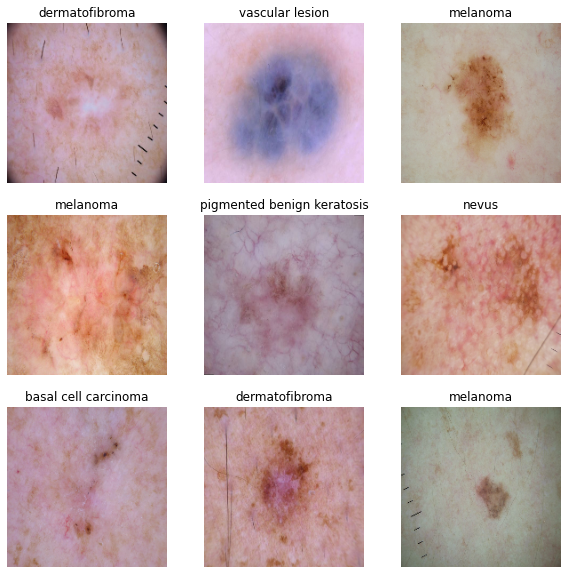

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes = 9
model=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
] 
)



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 845s 1s/step - loss: 1.9478 - accuracy: 0.2372 - val_loss: 1.6487 - val_accuracy: 0.3504
Epoch 2/20
169/169 [==============================] - 16s 96ms/step - loss: 1.6134 - accuracy: 0.3770 - val_loss: 1.5485 - val_accuracy: 0.3875
Epoch 3/20
169/169 [==============================] - 16s 96ms/step - loss: 1.5063 - accuracy: 0.4141 - val_loss: 1.3715 - val_accuracy: 0.4625
Epoch 4/20
169/169 [==============================] - 16s 95ms/step - loss: 1.4285 - accuracy: 0.4496 - val_loss: 1.3163 - val_accuracy: 0.4952
Epoch 5/20
169/169 [==============================] - 16s 95ms/step - loss: 1.3167 - accuracy: 0.4926 - val_loss: 1.2491 - val_accuracy: 0.5212
Epoch 6/20
169/169 [==============================] - 16s 96ms/step - loss: 1.2156 - accuracy: 0.5326 - val_loss: 1.1447 - val_accuracy: 0.5694
Epoch 7/20
169/169 [==============================] - 16s 96ms/step - loss: 1.1208 - accuracy: 0.5679 - val_loss: 1.1067 - val_accuracy: 

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        3

### Train the model

### Visualizing training results

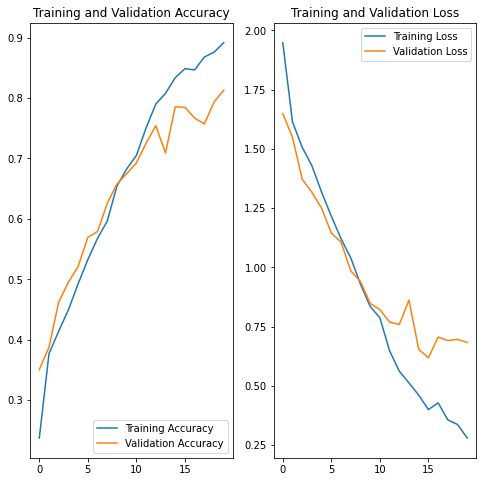

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

* We can clearly see there are signs of _overfitting_ , since the validation accuracy is far less than the training accuracy.


### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9
model=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
] 
)




### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 11s 60ms/step - loss: 2.1568 - accuracy: 0.1610 - val_loss: 2.1151 - val_accuracy: 0.2131
Epoch 2/20
169/169 [==============================] - 9s 56ms/step - loss: 1.8778 - accuracy: 0.2672 - val_loss: 1.7610 - val_accuracy: 0.3267
Epoch 3/20
169/169 [==============================] - 9s 56ms/step - loss: 1.6581 - accuracy: 0.3609 - val_loss: 1.6477 - val_accuracy: 0.4098
Epoch 4/20
169/169 [==============================] - 9s 56ms/step - loss: 1.5350 - accuracy: 0.4062 - val_loss: 1.5142 - val_accuracy: 0.4298
Epoch 5/20
169/169 [==============================] - 9s 56ms/step - loss: 1.4927 - accuracy: 0.4279 - val_loss: 1.4506 - val_accuracy: 0.4484
Epoch 6/20
169/169 [==============================] - 9s 56ms/step - loss: 1.4473 - accuracy: 0.4427 - val_loss: 1.5126 - val_accuracy: 0.4209
Epoch 7/20
169/169 [==============================] - 9s 56ms/step - loss: 1.4018 - accuracy: 0.4514 - val_loss: 1.4042 - val_accuracy: 0.465

### Visualizing the results

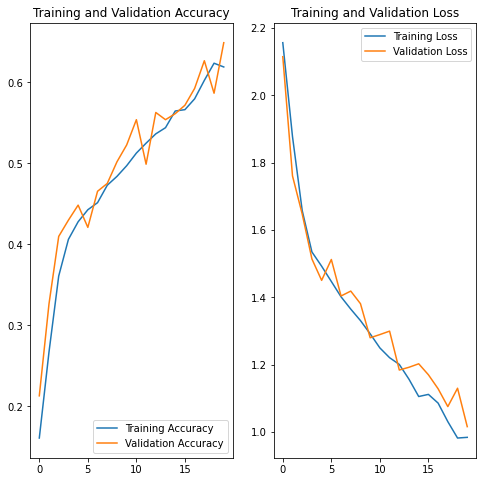

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

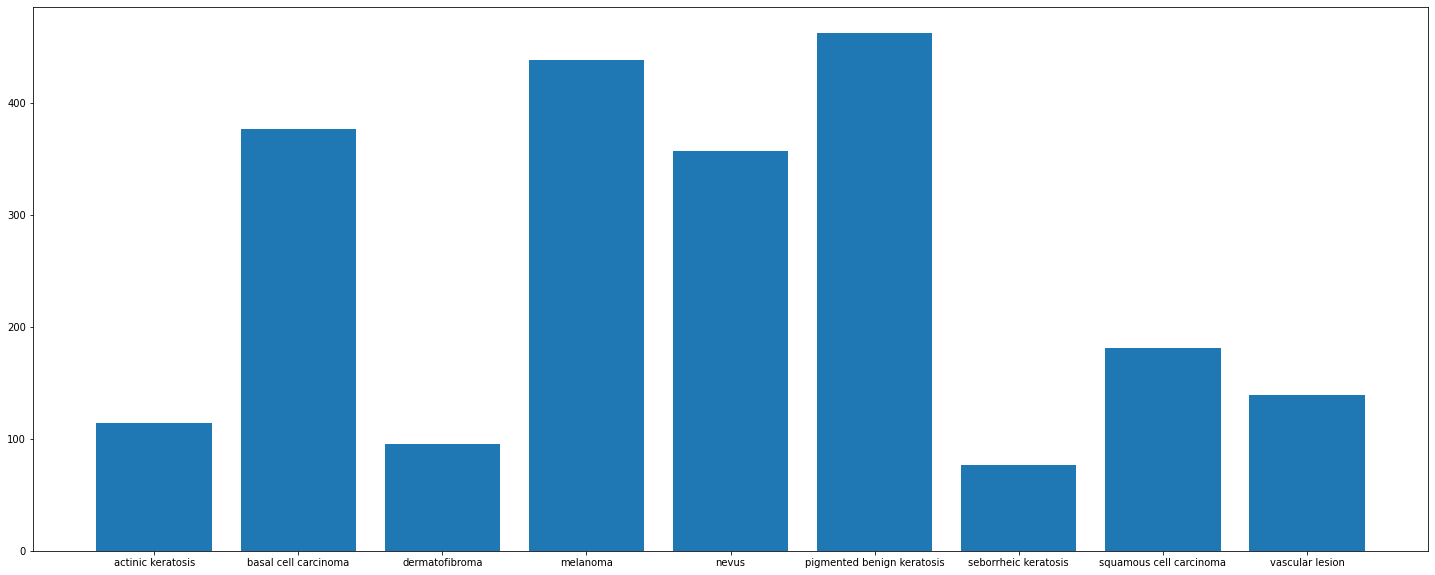

In [27]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

***seborrheic keratosis has the least number of samples:***

#### - Which classes dominate the data in terms proportionate number of samples?

***pigmented benign keratosis dominates the samples***


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [54]:
path_to_training_dataset="/content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 101 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD075281610>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD077837ED0>: 100%|██████████| 500/500 [00:22<00:00, 22.48 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD077939A50>: 100%|██████████| 500/500 [00:23<00:00, 21.51 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD078205290>: 100%|██████████| 500/500 [01:44<00:00,  4.76 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1019x717 at 0x7FD0F2A0AA90>: 100%|██████████| 500/500 [01:34<00:00,  5.28 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD078205F90>: 100%|██████████| 500/500 [00:22<00:00, 22.18 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD0780C0B50>: 100%|██████████| 500/500 [00:50<00:00,  9.92 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD075294C10>: 100%|██████████| 500/500 [00:22<00:00, 21.81 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train1/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD0780E9A90>: 100%|██████████| 500/500 [00:22<00:00, 22.53 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [41]:
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [42]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])


In [ ]:

# path_list=[]
# lesion_list=[]
# for i in class_names:
      
#     for j in data_dir_train.glob(i+'/*.jpg'):
#         path_list.append(str(j))
#         lesion_list.append(i)
# dataframe_dict_original = dict(zip(path_list, lesion_list))
# original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
# original_df

In [43]:
new_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [44]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [48]:
data_dir_train="/content/gdrive/MyDrive/Colab Notebooks/assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation' ,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [50]:

num_classes = 9
model=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.BatchNormalization() ,
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.BatchNormalization() ,
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.BatchNormalization() ,
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.BatchNormalization() ,
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.BatchNormalization() ,
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25) ,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
] 
)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [51]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [52]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 68s 234ms/step - loss: 1.6961 - accuracy: 0.3778 - val_loss: 2.3514 - val_accuracy: 0.1776
Epoch 2/30
281/281 [==============================] - 65s 228ms/step - loss: 1.3548 - accuracy: 0.4740 - val_loss: 2.0118 - val_accuracy: 0.2799
Epoch 3/30
281/281 [==============================] - 64s 225ms/step - loss: 1.2345 - accuracy: 0.5297 - val_loss: 1.9132 - val_accuracy: 0.3694
Epoch 4/30
281/281 [==============================] - 63s 221ms/step - loss: 1.1301 - accuracy: 0.5703 - val_loss: 2.1545 - val_accuracy: 0.3160
Epoch 5/30
281/281 [==============================] - 64s 223ms/step - loss: 1.0478 - accuracy: 0.6023 - val_loss: 1.9959 - val_accuracy: 0.3556
Epoch 6/30
281/281 [==============================] - 64s 225ms/step - loss: 0.9336 - accuracy: 0.6452 - val_loss: 1.2219 - val_accuracy: 0.5461
Epoch 7/30
281/281 [==============================] - 66s 232ms/step - loss: 0.8835 - accuracy: 0.6692 - val_loss: 1.2958 - val_ac

#### **Todo:**  Visualize the model results

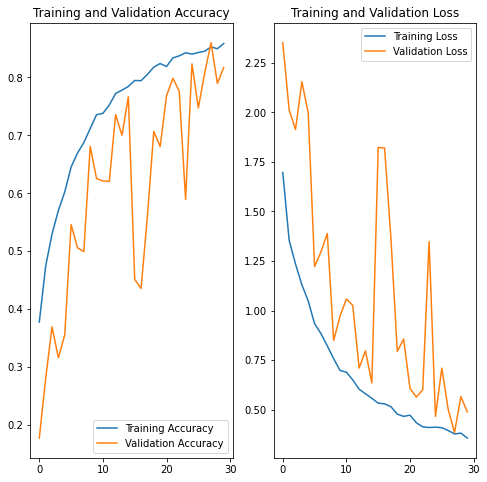

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Below was our approach and our findings : 

1) Loaded the data and read it.
2) Visualized the data, saw the images of each class of oncological diseases.
3) created a 6 layer cnn network without dropout to predict 9 classes of cancers and trained it.
4) visuaized the train and validation errors. We noticed ** the model had overfitted**

5) We then re-created another model with dropout and visualised it and **noticed the overfitting reduced, but not completely**

6) We then used augmentation to change the orientation of the dataset and recreated and trained the model with batch normalisation using 30 epochs.
The model had a good prediction but still it suffered from a overfitting. Therefore we still need to build an efficient model for the cancer prediction.

**Conclusion**
The model gave good prediction but the accuracy needs to be improved.